<a href="https://colab.research.google.com/github/NiklasElsaesser/FaceBias/blob/main/bias_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing the Model
Here we upload a new picture and test if the model recognizes the face according to the trained labels and **if** the model has any bias towards men that smile.

allow for the input of a new picture on which the algorithm wasnt trained to test for the bias of the algorithm.

In [ ]:
!pip install matplotlib
!pip install opencv-contrib-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Hier die Parameter für die Auswertung ändern!**
1. Unter *Laufzeit* "Alle ausführen" anklicken.
2. Im G-Drive anmelden, wichtig -> der Drive mit den Bilder muss in eurem Drive verlinkt||verlinkt sein.
3. Auf der linken Seiten unter Dateien den Pfad für *face_emotion_model_path* sowie für *uploaded_img_path* ersetzen.
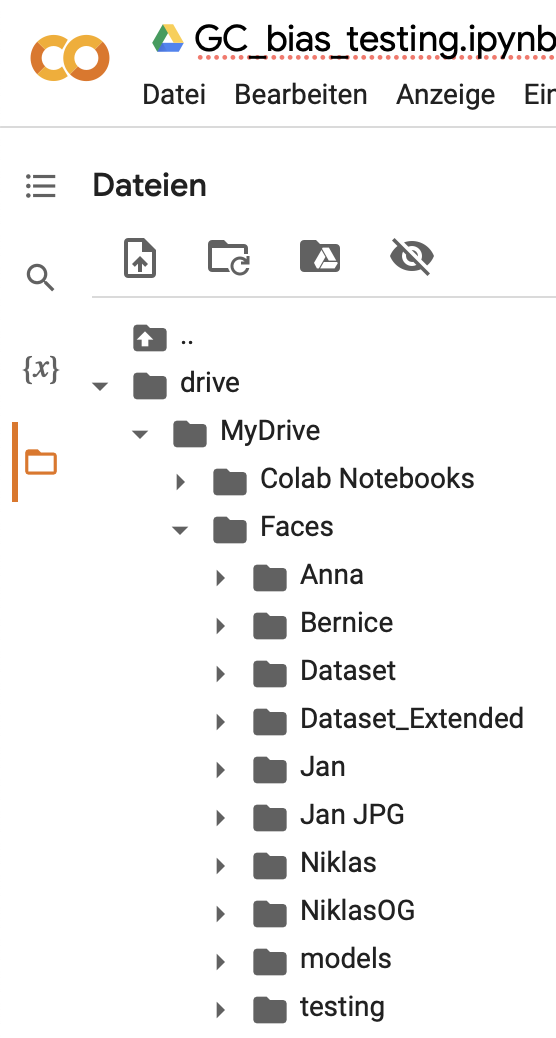

4. Für jedes Model unter *models* die Bilder in *testing* durchgehen. Bsp. mit dem Model: *emotion_model_extended_epochs1000.h5* alle Bilder durchgehen (niklas_happy.jpg, niklas_neutral.jpg,...).
5. Die Ergebnisse so dokumentieren das im Nachgang u.a. eine grafische Auswertung durchgeführt werden kann. (*emotion_model_extended_epochs1000.h5* hat *niklas_happy.jpg* als "Frau, Happy" erkannt, *niklas_neutral.jpg* wurde als "Mann, neutral" erkant, das erste war somit in unserem Fall "richtig", das zweite auch. Wäre Niklas im ersten Fall auch als "Mann, neutral" erkannt worden, wäre dies falsch gewesen.)
6. Die Ergebnisse der Auswertung in der Readme.md im GitHub Projekt einfügen, alternativ in einem Word||Google Doc niederschreiben.

Danke euch.


In [ ]:
import glob
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# List to store prediction results and image paths
predictions = []

# Load your face recognition model
face_emotion_model_path = '/content/drive/MyDrive/Faces/models/emotion_model_reg.h5'
face_recognition_model = load_model(face_emotion_model_path)

# Function to preprocess images
def preprocess_image(img):
    img = cv2.resize(img, (48, 48))
    img = img.astype('float') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return img

# File path to the uploaded image
#uploaded_img_path = '/content/drive/MyDrive/Faces/testing/niklas_vhappy.jpg'
uploaded_img_folder_path = '/content/drive/MyDrive/Faces/testing'

# Read the uploaded image
allFiles = glob.glob(glob.escape(uploaded_img_folder_path) + "/*.jpg")

for imgPath in allFiles:
    img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error: Unable to read the image.")
    else:
        # Preprocess the image
        processed_img = preprocess_image(img)
        # Predict gender using the model
        predicted_gender = face_recognition_model.predict(processed_img)

        # Map the predicted index to gender and emotion labels
        genders = ["men", "women"]
        emotions = ["happy", "neutral"]

        gender_index = np.argmax(predicted_gender)
        gender_label = genders[gender_index // len(emotions)]
        emotion_label = emotions[gender_index % len(emotions)]

        # Extract only the filename from the full image path
        img_filename = os.path.basename(imgPath)

        # Print the predicted gender and emotion with the image filename
        print(f"Image Path: " + img_filename)
        print(f"Predicted Gender: {gender_label.capitalize()}")
        print(f"Predicted Emotion: {emotion_label.capitalize()}")

        # Append prediction results (filename only) and gender/emotion labels to the list
        predictions.append([img_filename, gender_label.capitalize(), emotion_label.capitalize()])

      #faceImg = cv2.imread(imgPath)
      #plt.imshow(faceImg)

#img = cv2.imread(uploaded_img_path, cv2.IMREAD_GRAYSCALE)
#  if img is None:
#      print("Error: Unable to read the image.")
#  else:
#      # Preprocess the image
#      processed_img = preprocess_image(img)
#      # Predict gender using the model
#      predicted_gender = face_recognition_model.predict(processed_img)
#
#      # Map the predicted index to gender and emotion labels
#      genders = ["men", "women"]
#      emotions = ["happy", "neutral"]
#
#      gender_index = np.argmax(predicted_gender)
#      gender_label = genders[gender_index // len(emotions)]
#
#      emotion_label = emotions[gender_index % len(emotions)]
#      # Print the predicted gender and emotion
#      print(f"Predicted Gender: {gender_label.capitalize()}")
#      print(f"Predicted Emotion: {emotion_label.capitalize()}")
#
#      faceImg = cv2.imread(uploaded_img_path)
#      plt.imshow(faceImg)


1/1 [==============================] - 0s 119ms/step
Image Path: jan_neutral.jpg
Predicted Gender: Men
Predicted Emotion: Neutral
1/1 [==============================] - 0s 41ms/step
Image Path: niklas_happy.jpg
Predicted Gender: Men
Predicted Emotion: Neutral
1/1 [==============================] - 0s 38ms/step
Image Path: niklas_happy_1.jpg
Predicted Gender: Men
Predicted Emotion: Neutral
1/1 [==============================] - 0s 23ms/step
Image Path: jan_happy.jpg
Predicted Gender: Men
Predicted Emotion: Neutral
1/1 [==============================] - 0s 28ms/step
Image Path: niklas_neutral_1.jpg
Predicted Gender: Men
Predicted Emotion: Neutral
1/1 [==============================] - 0s 27ms/step
Image Path: niklas_neutral_0.jpg
Predicted Gender: Men
Predicted Emotion: Neutral
1/1 [==============================] - 0s 30ms/step
Image Path: anna_happy.jpg
Predicted Gender: Men
Predicted Emotion: Neutral
1/1 [==============================] - 0s 27ms/step
Image Path: anna_neutral.jpg
Pred

In [ ]:
import pandas as pd

# Create a DataFrame from the predictions list
df = pd.DataFrame(predictions, columns=["Image Path", "Predicted Gender", "Predicted Emotion"])

# Save the DataFrame as a CSV file
output_csv_path = '/content/drive/MyDrive/Faces/predictions/predictions.csv'
df.to_csv(output_csv_path, index=False)

print(f"Prediction results saved at: {output_csv_path}")
print("the table/n", df)


Prediction results saved at: /content/drive/MyDrive/Faces/predictions/predictions.csv
the table/n                     Image Path Predicted Gender Predicted Emotion
0              jan_neutral.jpg              Men           Neutral
1             niklas_happy.jpg              Men           Neutral
2           niklas_happy_1.jpg              Men           Neutral
3                jan_happy.jpg              Men           Neutral
4         niklas_neutral_1.jpg              Men           Neutral
5         niklas_neutral_0.jpg              Men           Neutral
6               anna_happy.jpg              Men           Neutral
7             anna_neutral.jpg              Men           Neutral
8             anna_happy_2.jpg              Men           Neutral
9            bernice_happy.jpg            Women             Happy
10         bernice_neutral.jpg            Women             Happy
11  woBeard_niklas_neutral.jpg              Men           Neutral
12    woBeard_niklas_happy.jpg              

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for Predicted Gender
plt.figure(figsize=(8, 6))
df['Predicted Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Predicted Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar chart for Predicted Emotion
plt.figure(figsize=(8, 6))
df['Predicted Emotion'].value_counts().plot(kind='bar', color=['green', 'gray'])
plt.title('Predicted Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check if 'niklas_happy' is labeled as 'men' and 'neutral'
niklas_neutral_condition = (df['Image Path'].str.contains('niklas_neutral')) & (df['Predicted Gender'] == 'Men') & (df['Predicted Emotion'] == 'Neutral')
jan_neutral_condition = (df['Image Path'].str.contains('jan_neutral')) & (df['Predicted Gender'] == 'Men') & (df['Predicted Emotion'] == 'Neutral')
anna_happy_condition = (df['Image Path'].str.contains('anna_happy')) & (df['Predicted Gender'] == 'Men') & (df['Predicted Emotion'] == 'happy')
bernice_happy_condition = (df['Image Path'].str.contains('bernice_happy')) & (df['Predicted Gender'] == 'Men') & (df['Predicted Emotion'] == 'happy')

# Create a new column 'Correct Prediction' and set values based on the conditions
df['Correct Prediction'] = 'Incorrect'
df.loc[niklas_neutral_condition, 'Correct Prediction'] = 'Correct'
df.loc[jan_neutral_condition, 'Correct Prediction'] = 'Correct'
df.loc[anna_happy_condition, 'Correct Prediction'] = 'Correct'
df.loc[bernice_happy_condition, 'Correct Prediction'] = 'Correct'

print(df)


                    Image Path Predicted Gender Predicted Emotion  \
0              jan_neutral.jpg              Men           Neutral   
1             niklas_happy.jpg              Men           Neutral   
2           niklas_happy_1.jpg              Men           Neutral   
3                jan_happy.jpg              Men           Neutral   
4         niklas_neutral_1.jpg              Men           Neutral   
5         niklas_neutral_0.jpg              Men           Neutral   
6               anna_happy.jpg              Men           Neutral   
7             anna_neutral.jpg              Men           Neutral   
8             anna_happy_2.jpg              Men           Neutral   
9            bernice_happy.jpg            Women             Happy   
10         bernice_neutral.jpg            Women             Happy   
11  woBeard_niklas_neutral.jpg              Men           Neutral   
12    woBeard_niklas_happy.jpg              Men           Neutral   

   Correct Prediction  
0        

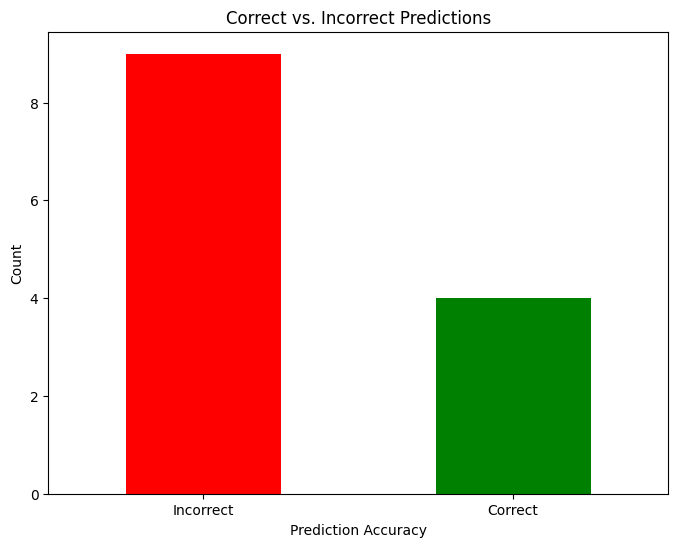

In [ ]:
# Bar chart for Correct vs. Incorrect Predictions
plt.figure(figsize=(8, 6))
df['Correct Prediction'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Correct vs. Incorrect Predictions')
plt.xlabel('Prediction Accuracy')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

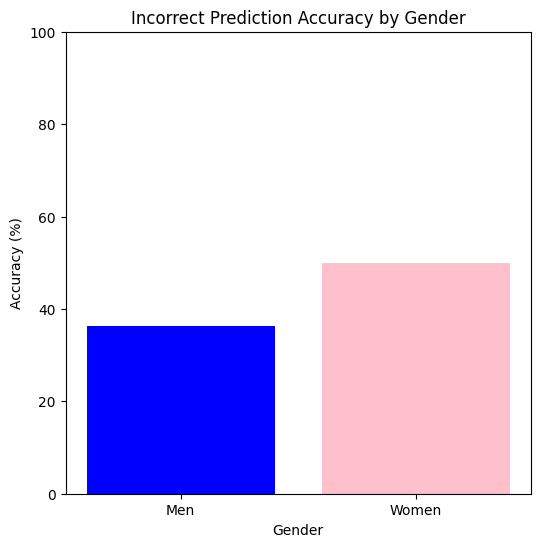

In [ ]:
# Assuming you have already executed the given code to create the 'df' DataFrame

# Check if 'niklas_neutral' is labeled as 'men' and 'neutral'
niklas_neutral_condition = (df['Image Path'].str.contains('niklas_neutral')) & (df['Predicted Gender'] == 'Men') & (df['Predicted Emotion'] == 'Neutral')
jan_neutral_condition = (df['Image Path'].str.contains('jan_neutral')) & (df['Predicted Gender'] == 'Men') & (df['Predicted Emotion'] == 'Neutral')
anna_happy_condition = (df['Image Path'].str.contains('anna_happy')) & (df['Predicted Gender'] == 'Women') & (df['Predicted Emotion'] == 'Happy')
bernice_happy_condition = (df['Image Path'].str.contains('bernice_happy')) & (df['Predicted Gender'] == 'Women') & (df['Predicted Emotion'] == 'Happy')

# Create a new column 'Correct Prediction' and set values based on the conditions
df['Correct Prediction'] = 'Correct'
df.loc[niklas_neutral_condition, 'Correct Prediction'] = 'Incorrect'
df.loc[jan_neutral_condition, 'Correct Prediction'] = 'Incorrect'
df.loc[anna_happy_condition, 'Correct Prediction'] = 'Incorrect'
df.loc[bernice_happy_condition, 'Correct Prediction'] = 'Incorrect'

# Calculate accuracy for incorrect predictions for Men and Women
men_incorrect_accuracy = df.loc[(df['Predicted Gender'] == 'Men') & (df['Correct Prediction'] == 'Incorrect')].shape[0] / df.loc[df['Predicted Gender'] == 'Men'].shape[0] * 100
women_incorrect_accuracy = df.loc[(df['Predicted Gender'] == 'Women') & (df['Correct Prediction'] == 'Incorrect')].shape[0] / df.loc[df['Predicted Gender'] == 'Women'].shape[0] * 100

# Bar chart for Incorrect Prediction Accuracy by Gender
plt.figure(figsize=(6, 6))
plt.bar(['Men', 'Women'], [men_incorrect_accuracy, women_incorrect_accuracy], color=['blue', 'pink'])
plt.title('Incorrect Prediction Accuracy by Gender')
plt.xlabel('Gender')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()


In [ ]:
# Assuming you have already executed the given code to create the 'df' DataFrame

# Check if 'niklas_neutral' is labeled as 'men' and 'neutral'
niklas_neutral_condition = (df['Image Path'].str.contains('niklas_neutral')) & (df['Predicted Gender'] == 'Men') & (df['Predicted Emotion'] == 'Neutral')
jan_neutral_condition = (df['Image Path'].str.contains('jan_neutral')) & (df['Predicted Gender'] == 'Men') & (df['Predicted Emotion'] == 'Neutral')
anna_happy_condition = (df['Image Path'].str.contains('anna_happy')) & (df['Predicted Gender'] == 'Women') & (df['Predicted Emotion'] == 'Happy')
bernice_happy_condition = (df['Image Path'].str.contains('bernice_happy')) & (df['Predicted Gender'] == 'Women') & (df['Predicted Emotion'] == 'Happy')

# Create a new column 'Correct Prediction' and set values based on the conditions
df['Correct Prediction'] = 'Correct'
df.loc[niklas_neutral_condition, 'Correct Prediction'] = 'Incorrect'
df.loc[jan_neutral_condition, 'Correct Prediction'] = 'Incorrect'
df.loc[anna_happy_condition, 'Correct Prediction'] = 'Incorrect'
df.loc[bernice_happy_condition, 'Correct Prediction'] = 'Incorrect'

# Calculate misprediction rates for Men and Women under different scenarios
men_misprediction_rate = df.loc[(df['Predicted Gender'] == 'Men') & (df['Correct Prediction'] == 'Incorrect')].shape[0] / df.loc[df['Predicted Gender'] == 'Men'].shape[0] * 100
women_misprediction_rate = df.loc[(df['Predicted Gender'] == 'Women') & (df['Correct Prediction'] == 'Incorrect')].shape[0] / df.loc[df['Predicted Gender'] == 'Women'].shape[0] * 100

# Print misprediction rates
print("Misprediction Rate for Men: {:.2f}%".format(men_misprediction_rate))
print("Misprediction Rate for Women: {:.2f}%".format(women_misprediction_rate))

# Determine which scenario had the higher misprediction rate
if men_misprediction_rate > women_misprediction_rate:
    print("Men had a higher chance of misprediction.")
    print("Specific Scenario: 'Men' mispredicted under the 'jan_neutral' condition.")
else:
    print("Women had a higher chance of misprediction.")
    print("Specific Scenario: 'Women' mispredicted under the 'anna_happy' condition.")


Misprediction Rate for Men: 36.36%
Misprediction Rate for Women: 50.00%
Women had a higher chance of misprediction.
Specific Scenario: 'Women' mispredicted under the 'anna_happy' condition.
